In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import files

uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes (1).csv


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
!pip install plotly

In [ ]:
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

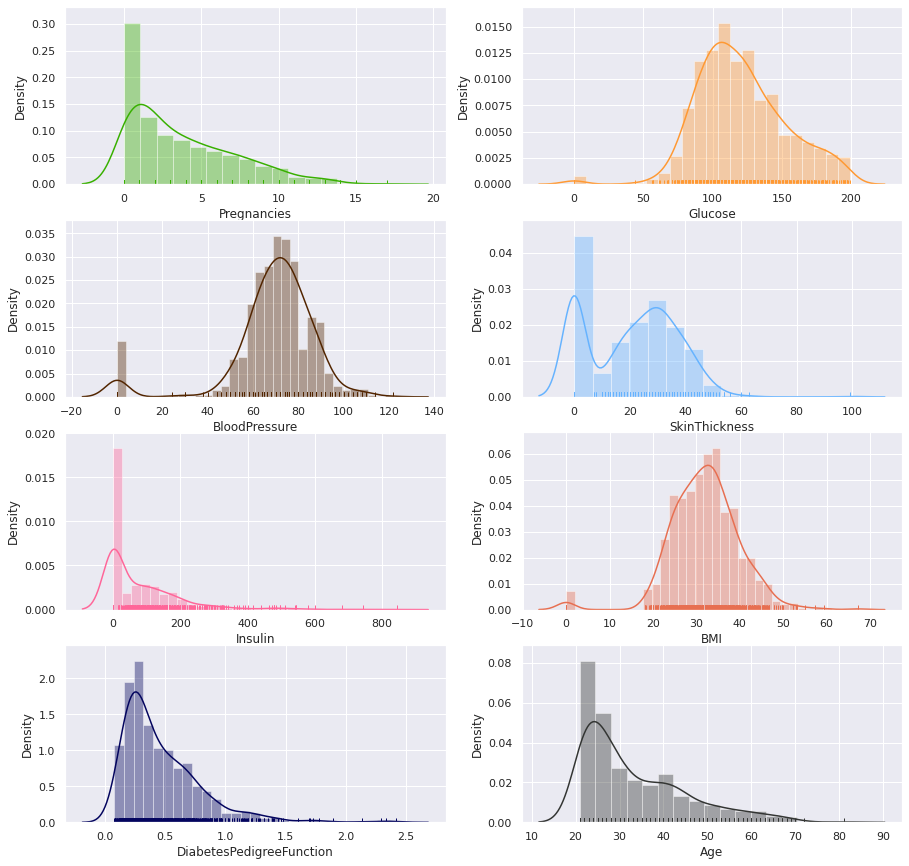

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
sns.distplot(df2['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df2['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df2['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df2['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df2['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df2['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df2['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df2['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()


In [ ]:
df2["BMI"] = df2["BMI"].apply(lambda x: df2.BMI.mean() if x>40 else x)

In [ ]:
X=df2.drop('Outcome',axis='columns')
y=df2['Outcome']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X,y,batch_size=32,epochs=5)

Epoch 1/5
24/24 [==============================] - 15s 2ms/step - loss: 5.0716 - accuracy: 0.5758
Epoch 2/5
24/24 [==============================] - 0s 2ms/step - loss: 2.4520 - accuracy: 0.5239
Epoch 3/5
24/24 [==============================] - 0s 2ms/step - loss: 1.6027 - accuracy: 0.4834
Epoch 4/5
24/24 [==============================] - 0s 2ms/step - loss: 1.2687 - accuracy: 0.5523
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 1.1330 - accuracy: 0.5700


In [ ]:
_, accuracy = model.evaluate(X,y)    #testing
print("Model accuracy: %.2f"% (accuracy*100))
predictions = model.predict(X)     #make predictions
#round the prediction
rounded = [round(X[0]) for X in predictions]

24/24 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.5638
Model accuracy: 56.38
